# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**JOSEPH, OKONKWO**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from statsmodels.graphics.correlation import plot_corr


# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

<a id="three"></a>
## 3.  Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
# confirm the dimensions of the training dataset
df_train.shape

(8763, 49)

In [4]:
# look at the column names 
df_train.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

1. From the results of the foregoing codes, the dataset contains 8763 rows and 49 columns. The columns contain data regarding various weather features recorded '3-hourly' from specific spanish cities. The features which include wind speed, wind direction, humidity, clouds quantity, pressure,snow levels, weather Id, rain levels, and temperature are factors which determine to varying degrees the amount of renewable energy available for generation and by extension the load shortfall in relation to fossil fuel energy sources. To enable a much closer look at the data within each column it is necessary to break up the dataframe along the column axis into a number of parts.

In [5]:
# transpose data to enable full view of data
df_train_trans = df_train.transpose(copy = True)


In [6]:
# provide full view of summary statistcs of data features 
df_train.describe().transpose(copy = True)


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8763.0,4381.000000,2529.804538,0.000000,2190.500000,4381.000000,6571.500000,8.762000e+03
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02


2. It is clear from the views of the data above and accompanying statistical summaries that some recorded features are sources of concern. First, the column 'Valencia_wind_deg' - which like corresponding data from other cities is supposed to carry wind direction data measured in degrees - contains categorical data measured in levels. Second, Columns depicting hourly rain data in various cities seem incompartible with the time schedule of recording which is every 3 hours. Third, the columns containing weather_Id need to be understood more clearly to elicit its bearing on the corresponding weather feature combination for each city. A close look at these features shortly. 

3. For other features, rain, pressure, wind and others, we have to plot feature interractions to tell each feature's influence on load shortfall, if any. In order to this, we will need to produce a condensed dataframe where each column contains the average quantity of each weather feature across all cities. Since we are concerned with the shortfall of the whole country and not just for each city, it is safe to analyse for instance, the mean rainfall, mean temperature or mean pressure with respect to load shortfall for each observation of load shortfall for the whole of Spain. Moreso, we expect the values of a feature to correlate perfectly across the given cities, giving causes for multicollinearity. But before going into all that, first is a little data engineering. We have to ensure there are no missing values in the datasets and that all features are numerical in dtype. 


In [7]:
# Examine columns with missing values and data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [8]:
# replace missing values with the most frequent value in 'Valencia_pressure'
df_train['Valencia_pressure'] = df_train['Valencia_pressure'].fillna(df_train['Valencia_pressure'].mode()[0])

In [9]:
# examine the 3 non-numerical columns 
cols = [col for col in df_train.columns if df_train[col].dtype not in ['int64', 'float64']]
df_train[cols]

,time,Valencia_wind_deg,Seville_pressure
0,2015-01-01 03:00:00,level_5,sp25
1,2015-01-01 06:00:00,level_10,sp25
2,2015-01-01 09:00:00,level_9,sp25
3,2015-01-01 12:00:00,level_8,sp25
4,2015-01-01 15:00:00,level_7,sp25
...,...,...,...
8758,2017-12-31 09:00:00,level_6,sp23
8759,2017-12-31 12:00:00,level_6,sp23
8760,2017-12-31 15:00:00,level_9,sp22
8761,2017-12-31 18:00:00,level_8,sp23


4. Following from the above results, the 'time' column can easily be converted to 'datetime' datatype and some other features engineered from it. The other two features poses a bigger problem. For one thing, they seem like different notations for angle and pressure (perhaps the whole azimuth plane is divided into levels and may be 'sp' stands for static pressure or standard pressure pressure where 1 sp equals 1 atm = 100 kPa, especially seeing that temperatures were most likely given in kelvin)). Let us go ahead and examine the unique values of these features.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'level_5'),
  Text(1, 0, 'level_10'),
  Text(2, 0, 'level_9'),
  Text(3, 0, 'level_8'),
  Text(4, 0, 'level_7'),
  Text(5, 0, 'level_6'),
  Text(6, 0, 'level_4'),
  Text(7, 0, 'level_3'),
  Text(8, 0, 'level_1'),
  Text(9, 0, 'level_2')])

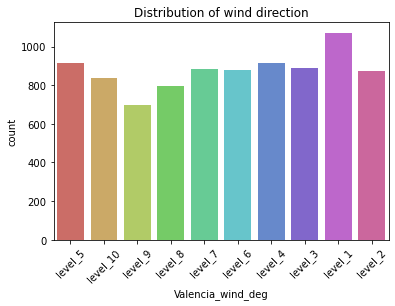

In [10]:
sns.countplot(x = 'Valencia_wind_deg', data = df_train, palette="hls")
plt.title("Distribution of wind direction")
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'sp25'),
  Text(1, 0, 'sp23'),
  Text(2, 0, 'sp24'),
  Text(3, 0, 'sp21'),
  Text(4, 0, 'sp16'),
  Text(5, 0, 'sp9'),
  Text(6, 0, 'sp15'),
  Text(7, 0, 'sp19'),
  Text(8, 0, 'sp22'),
  Text(9, 0, 'sp11'),
  Text(10, 0, 'sp8'),
  Text(11, 0, 'sp4'),
  Text(12, 0, 'sp6'),
  Text(13, 0, 'sp13'),
  Text(14, 0, 'sp17'),
  Text(15, 0, 'sp20'),
  Text(16, 0, 'sp18'),
  Text(17, 0, 'sp14'),
  Text(18, 0, 'sp12'),
  Text(19, 0, 'sp5'),
  Text(20, 0, 'sp10'),
  Text(21, 0, 'sp7'),
  Text(22, 0, 'sp3'),
  Text(23, 0, 'sp2'),
  Text(24, 0, 'sp1')])

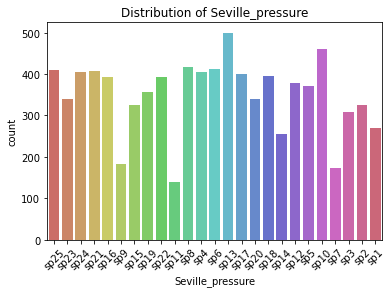

In [11]:
sns.countplot(x = 'Seville_pressure', data = df_train, palette="hls")
plt.title("Distribution of Seville_pressure")
plt.xticks(rotation = 45)

5. The above plot may suggest we drop the columns altogether because at best each level in the 'Valencia_wind_deg' column only provides a range of angles and not a specific angular direction of wind. The sp notation for 'Seville_pressure' will require us multiplying each value by 100000 Pa giving us unrealistic atmospheric pressure values. Thereafter, we can go ahead as discussed earlier to average out the values of each weather feature across all cities and store the resulting averages into new dataframes. This average in fact will minimise any effect of the columns dropped. The new dataframe will aslo contain the time data from df_train but will leave out the 'unnamed' column since its just a replica of the of the index.

In [12]:
# drop columns
df = df_train.drop(columns = ['Valencia_wind_deg','Seville_pressure'])
df

,Unnamed: 0,time,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.000000,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,8758,2017-12-31 09:00:00,1.000000,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,80.000000,...,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,8759,2017-12-31 12:00:00,5.000000,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,75.000000,...,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,8760,2017-12-31 15:00:00,6.333333,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,33.333333,...,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,8761,2017-12-31 18:00:00,7.333333,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,51.666667,...,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000


In [13]:
# create subsets of training data in terms of weather feature
df_wind_speed = df[['Madrid_wind_speed','Valencia_wind_speed','Bilbao_wind_speed','Barcelona_wind_speed','Seville_wind_speed']]
df_wind_deg = df[['Bilbao_wind_deg','Barcelona_wind_deg']]
df_humidity = df[['Seville_humidity','Madrid_humidity','Valencia_humidity']]
df_rain = df[['Bilbao_rain_1h','Barcelona_rain_1h','Seville_rain_1h','Seville_rain_3h','Madrid_rain_1h','Barcelona_rain_3h']]
df_clouds_all = df[['Bilbao_clouds_all','Seville_clouds_all','Madrid_clouds_all']]
df_pressure = df[['Barcelona_pressure','Bilbao_pressure','Valencia_pressure','Madrid_pressure']]
df_snow = df[['Bilbao_snow_3h','Valencia_snow_3h']]
df_weather_id = df[['Madrid_weather_id','Barcelona_weather_id','Seville_weather_id','Bilbao_weather_id']]
df_temp_min = df[['Valencia_temp_min','Bilbao_temp_min','Barcelona_temp_min','Seville_temp_min','Madrid_temp_min']]
df_temp = df[['Barcelona_temp','Bilbao_temp','Madrid_temp','Seville_temp','Valencia_temp']]
df_temp_max = df[['Barcelona_temp_max','Bilbao_temp_max','Madrid_temp_max','Seville_temp_max','Valencia_temp_max']]


In [14]:
df_wind_speed.describe()

,Madrid_wind_speed,Valencia_wind_speed,Bilbao_wind_speed,Barcelona_wind_speed,Seville_wind_speed
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,2.586272,1.850356,2.870497,2.425045
std,1.850371,2.411190,1.695888,1.792197,1.672895
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.666667,1.666667,1.000000
50%,2.000000,1.666667,1.000000,2.666667,2.000000
75%,3.333333,3.666667,2.666667,4.000000,3.333333
max,13.000000,52.000000,12.666667,12.666667,11.666667


In [15]:
df_wind_deg.describe()

,Bilbao_wind_deg,Barcelona_wind_deg
count,8763.000000,8763.000000
mean,158.957511,190.544848
std,102.056299,89.077337
min,0.000000,0.000000
25%,73.333333,118.166667
50%,147.000000,200.000000
75%,234.000000,260.000000
max,359.333333,360.000000


In [16]:
df_humidity.describe()

,Seville_humidity,Madrid_humidity,Valencia_humidity
count,8763.000000,8763.000000,8763.000000
mean,62.658793,57.414717,65.247727
std,22.621226,24.335396,19.262322
min,8.333333,6.333333,10.333333
25%,44.333333,36.333333,51.333333
50%,65.666667,58.000000,67.000000
75%,82.000000,78.666667,81.333333
max,100.000000,100.000000,100.000000


In [17]:
df_rain.describe()

,Bilbao_rain_1h,Barcelona_rain_1h,Seville_rain_1h,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,0.135753,0.128906,0.039439,0.000243,0.037818,0.000439
std,0.374901,0.634730,0.175857,0.003660,0.152639,0.003994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,12.000000,3.000000,0.093333,3.000000,0.093000


In [18]:
df_pressure.describe()

,Barcelona_pressure,Bilbao_pressure,Valencia_pressure,Madrid_pressure
count,8.763000e+03,8763.000000,8763.000000,8763.000000
mean,1.377965e+03,1017.739549,1013.455228,1010.316920
std,1.407314e+04,10.046124,8.684485,22.198555
min,6.706667e+02,971.333333,972.666667,927.666667
25%,1.014000e+03,1013.000000,1012.666667,1012.333333
50%,1.018000e+03,1019.000000,1017.000000,1017.333333
75%,1.022000e+03,1024.000000,1018.000000,1022.000000
max,1.001411e+06,1042.000000,1021.666667,1038.000000


In [19]:
df_snow.describe()

,Bilbao_snow_3h,Valencia_snow_3h
count,8763.000000,8763.000000
mean,0.031912,0.000205
std,0.557264,0.011866
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,21.300000,0.791667


In [20]:
df_temp.describe()

,Barcelona_temp,Bilbao_temp,Madrid_temp,Seville_temp,Valencia_temp
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,289.855459,286.422929,288.419439,293.978903,290.592152
std,6.528111,6.818682,9.346796,7.920986,7.162274
min,270.816667,267.483333,264.983333,272.063000,269.888000
25%,284.973443,281.374167,281.404281,288.282917,285.150000
50%,289.416667,286.158333,287.053333,293.323333,290.176667
75%,294.909000,291.034167,295.154667,299.620333,296.056667
max,307.316667,310.710000,313.133333,314.976667,310.426667


In [21]:
df_temp_max.describe()

,Barcelona_temp_max,Bilbao_temp_max,Madrid_temp_max,Seville_temp_max,Valencia_temp_max
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,291.157644,287.966027,289.540309,297.479527,291.337233
std,7.273538,7.105590,9.752047,8.875812,7.565692
min,272.150000,269.063000,264.983333,272.063000,269.888000
25%,285.483333,282.836776,282.150000,291.312750,285.550167
50%,290.150000,287.630000,288.116177,297.101667,291.037000
75%,296.855000,292.483333,296.816667,304.150000,297.248333
max,314.076667,317.966667,314.483333,320.483333,314.263333


6. We have paused here to examine these datasets above to examine how some weather features are distributed across the cities. This may help us observe any anormalies within the data or inform the decisions regarding possible location of renewable energy infrastructure.  It can be observed for instance that the city of Seville is observed to have recorded the highest temperature levels; Seville provides the highest potential of supplying the highest amounts of solar power. The rain data collected from some cities are observed to be have been denoted as '1h' in constrast with the load shortfall which is denoted '3h'. We may take off this data as they may be a source of distortion in our machine learning process. We can also deduce that Valencia recorded the highest windspeed of 52 units. However, the value suggest the presence of a contextual or point outlier when compared to other maximums. In the same vein, Barcelona may be regarded as the city with the overall highest amount of pressure but unlike the Valencia's maximum wind speed, its maximum value is certainly a point outlier because a pressure of about 1 million units at sea level is a very unlikely. More on these outliers later. For now, we may move ahead with putting all these mean feature data within one dataset but not before taking off those 1-hourly rain data.

In [22]:
# drop 1h rain feature data
df_rain = df_rain.drop(columns = ['Bilbao_rain_1h','Barcelona_rain_1h','Seville_rain_1h', 'Madrid_rain_1h'])
df_rain

,Seville_rain_3h,Barcelona_rain_3h
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
8758,0.0,0.0
8759,0.0,0.0
8760,0.0,0.0
8761,0.0,0.0


In [23]:
# append extra column with mean value of weather feature across all cities
ave_wind_speed = df_wind_speed.mean(axis = 1)
ave_wind_deg = df_wind_deg.mean(axis = 1)
ave_humidity = df_humidity.mean(axis = 1)
ave_rain = df_rain.mean(axis = 1)
ave_clouds_all = df_clouds_all.mean(axis = 1)
ave_pressure = df_pressure.mean(axis = 1)
ave_snow = df_snow.mean(axis = 1)
ave_weather_id = df_weather_id.mean(axis = 1)
ave_temp_min = df_temp_min.mean(axis = 1)
ave_temp = df_temp.mean(axis = 1)
ave_temp_max = df_temp_max.mean(axis = 1)
ave_temp_max

0       272.086456
1       272.799533
2       277.224046
3       283.351587
4       283.134500
           ...    
8758    284.216667
8759    288.550000
8760    288.927933
8761    287.550000
8762    286.750000
Length: 8763, dtype: float64

In [24]:
 # creating a time feature and load_shortfall series
time = df['time']
load_shortfall_3h = df['load_shortfall_3h']

In [25]:
# create a dictionary containing all feature series with their names and keys in a desirable order
features_ave = {'Time': time, 'Ave_weather_id': ave_weather_id, 'Ave_wind_speed': ave_wind_speed, 'Ave_wind_deg': ave_wind_deg, 'Ave_humidity': ave_humidity, 
              'Ave_rain': ave_rain, 'Ave_clouds_all': ave_clouds_all, 'Ave_pressure': ave_pressure, 'Ave_snow': ave_snow, 'Ave_temp_min': ave_temp_min,
               'Ave_temp': ave_temp, 'Ave_temp_max': ave_temp_max, 'load_shortfall_3h': load_shortfall_3h}

# convert dictionary of feature series into dataframe named df_train_clean
df_train_clean = pd.DataFrame(features_ave)

df_train_clean


,Time,Ave_weather_id,Ave_wind_speed,Ave_wind_deg,Ave_humidity,Ave_rain,Ave_clouds_all,Ave_pressure,Ave_snow,Ave_temp_min,Ave_temp,Ave_temp_max,load_shortfall_3h
0,2015-01-01 03:00:00,800.000000,2.400000,133.000000,71.333333,0.0,0.000000,1011.333333,0.0,272.086456,272.086456,272.086456,6715.666667
1,2015-01-01 06:00:00,800.000000,2.066667,180.000000,71.333333,0.0,0.000000,1012.500000,0.0,272.799533,272.799533,272.799533,4171.666667
2,2015-01-01 09:00:00,800.000000,1.533333,270.166667,67.111111,0.0,0.000000,1013.333333,0.0,277.224046,277.224046,277.224046,4274.666667
3,2015-01-01 12:00:00,800.000000,1.866667,236.333333,58.555556,0.0,0.000000,1019.166667,0.0,283.351587,283.351587,283.351587,5075.666667
4,2015-01-01 15:00:00,800.000000,1.933333,222.500000,58.111111,0.0,0.666667,1030.916667,0.0,283.134500,283.134500,283.134500,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,2017-12-31 09:00:00,775.083333,2.133333,155.166667,85.333333,0.0,60.555556,1020.166667,0.0,282.283333,283.219333,284.216667,-28.333333
8759,2017-12-31 12:00:00,791.833333,3.933333,216.666667,69.111111,0.0,62.222222,1019.750000,0.0,286.550000,287.598000,288.550000,2266.666667
8760,2017-12-31 15:00:00,726.500000,6.200000,270.000000,61.111111,0.0,60.555556,1016.083333,0.0,286.794600,287.975933,288.927933,822.000000
8761,2017-12-31 18:00:00,684.125000,5.400000,235.000000,63.888889,0.0,57.222222,1019.583333,0.0,285.216667,286.430667,287.550000,-760.000000


7. Having significantly condensed the dataset without necessarily impacting on its ability to effectively train our model, we may now go ahead and draw out some inferences from each feature's interractions with load shortfall and with one another.The essence of this is to check for possible linearity between a feature and the target variable (in this case, 'load_shortfall) and possible collinearity between any pair of features over time. We'll make use of scatter plots and heat maps to elicit such interractions. But first, some column manipulation to make the response variable come first.

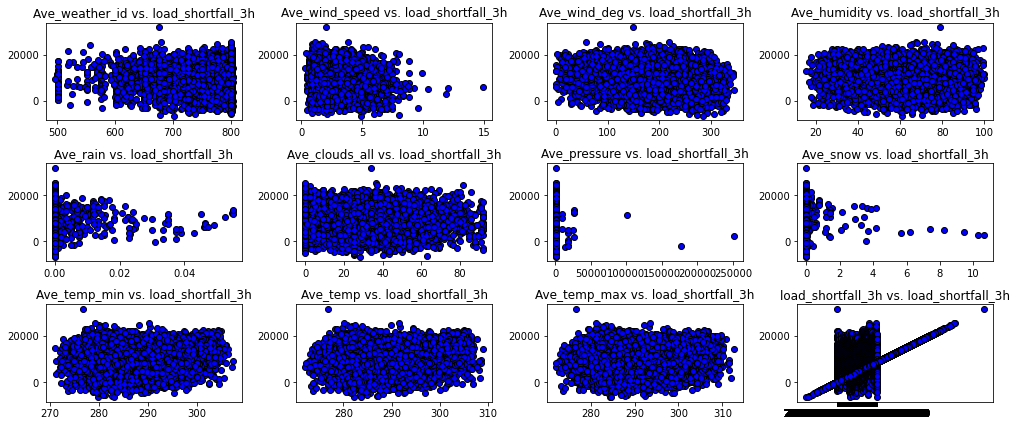

In [26]:
# plot relevant feature interactions
fig, axs = plt.subplots(3,4, figsize=(14,6),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(df_train_clean.columns):
    axs[index-1].set_title("{} vs. load_shortfall_3h".format(column),fontsize=12)
    axs[index-1].scatter(x=df_train_clean[column],y=df_train_clean['load_shortfall_3h'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)


8. From the foregoing plots , it is quite clear that no obvious linearity exists between any of the features and the load shortfall. This means that no feature exists which changes the shortfall by the same amount with each change in its own quantity. There is however a suggestion from the plots that the variance with respect to shortfall of the three temperature features are similar. Though this may be expected, we will still have to confirm their correlation as a potential source of multicollinearity using a heatmap. 

In [27]:
# evaluate correlation
correlation = df_train_clean.corr()
correlation

,Ave_weather_id,Ave_wind_speed,Ave_wind_deg,Ave_humidity,Ave_rain,Ave_clouds_all,Ave_pressure,Ave_snow,Ave_temp_min,Ave_temp,Ave_temp_max,load_shortfall_3h
Ave_weather_id,1.000000,-0.249671,-0.040275,-0.265155,-0.037892,-0.596429,-0.034199,-0.066925,0.176990,0.195169,0.209514,0.135499
Ave_wind_speed,-0.249671,1.000000,0.230740,-0.262193,-0.009704,0.342227,0.021890,0.078682,0.110464,0.110667,0.100607,-0.157644
Ave_wind_deg,-0.040275,0.230740,1.000000,-0.002791,-0.016676,0.119769,0.025140,-0.046898,-0.089915,-0.090755,-0.092286,-0.168674
Ave_humidity,-0.265155,-0.262193,-0.002791,1.000000,0.042482,0.329542,0.018477,0.006639,-0.726230,-0.722368,-0.692962,-0.118548
Ave_rain,-0.037892,-0.009704,-0.016676,0.042482,1.000000,0.041851,-0.002890,0.001751,-0.045953,-0.062838,-0.080205,-0.037829
Ave_clouds_all,-0.596429,0.342227,0.119769,0.329542,0.041851,1.000000,0.033503,0.064971,-0.211687,-0.228930,-0.241156,-0.147201
Ave_pressure,-0.034199,0.021890,0.025140,0.018477,-0.002890,0.033503,1.000000,-0.001804,-0.027319,-0.030635,-0.033640,-0.034161
Ave_snow,-0.066925,0.078682,-0.046898,0.006639,0.001751,0.064971,-0.001804,1.000000,-0.085402,-0.094102,-0.102383,-0.031910
Ave_temp_min,0.176990,0.110464,-0.089915,-0.726230,-0.045953,-0.211687,-0.027319,-0.085402,1.000000,0.986264,0.943946,0.194317
Ave_temp,0.195169,0.110667,-0.090755,-0.722368,-0.062838,-0.228930,-0.030635,-0.094102,0.986264,1.000000,0.984565,0.184345


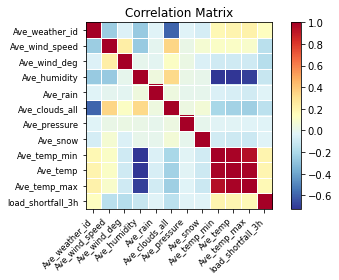

In [28]:
# view correlation with a heatmap
fig = plot_corr(correlation, xnames = correlation.columns)

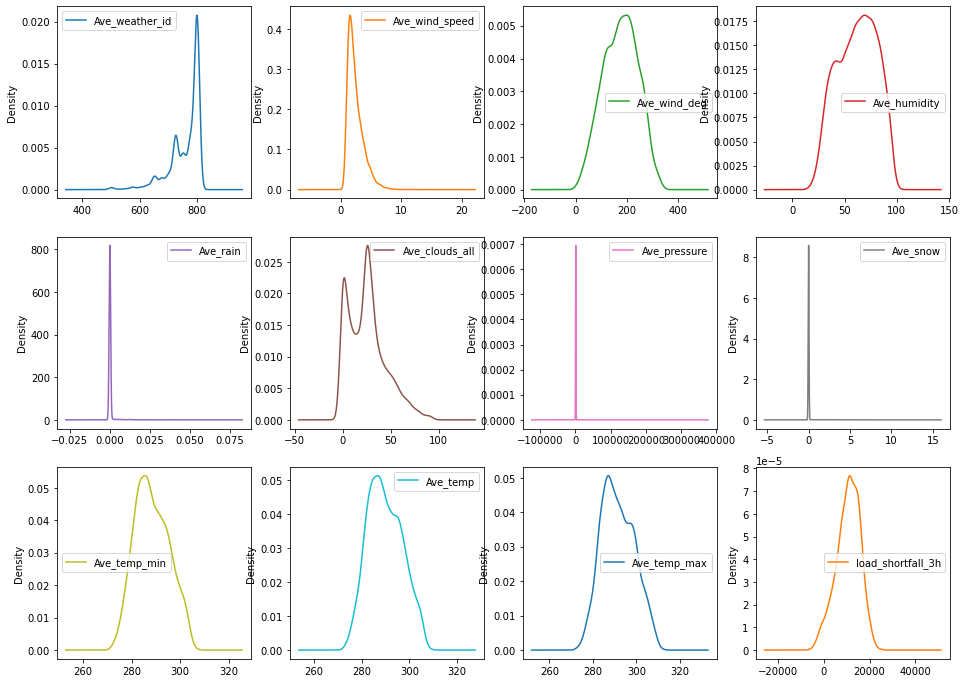

In [29]:
# have a look at feature distributions
features = df_train_clean.drop('Time', axis = 1) # create a list of all numerical features
features.plot(kind='density', subplots=True, layout=(3, 4), sharex=False, figsize=(16, 12));

In [30]:
# examine measure of presence of outliers
df_train_clean.drop('Time', axis = 1).kurtosis()

Ave_weather_id          3.633779
Ave_wind_speed          3.708942
Ave_wind_deg           -0.640068
Ave_humidity           -0.951951
Ave_rain              173.988275
Ave_clouds_all          0.228047
Ave_pressure         3688.345400
Ave_snow              799.972093
Ave_temp_min           -0.667229
Ave_temp               -0.678971
Ave_temp_max           -0.645494
load_shortfall_3h      -0.118999
dtype: float64

<AxesSubplot:xlabel='variable', ylabel='value'>

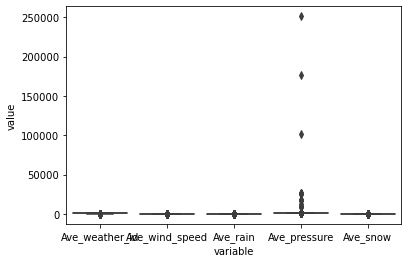

In [31]:
# create the subset for features with high kurtosis
df_outliers = df_train_clean[['Ave_weather_id','Ave_wind_speed','Ave_rain','Ave_pressure','Ave_snow']]

#melt dataframe into long format
df_melted = pd.melt(df_outliers)

#plot boxplots for variables
sns.boxplot(x='variable', y='value', data=df_melted)   

9. We can deduce from the plots above that no signiicant correlation exists between any independent variable and the target variable. However, we notice some interesting correlations elsewhere. We can deduce that the weather_id feature is majorly characterised by rain and cloud quantities which have weak negative correlations with the load_shortfall. We can also confirm as suggested by our earlier scatter plots that while the temperature features provide the highest correlation with demand shortfall, very strong correlation exists amongst them. As expected too, the temperature features together produce a strong negative correlation with the humidity levels. We also do not expect a significant effect of pressure and snow on the target variable seeing how thinly distributed their levels are as shown in the density plots and confirmed by the heat map. This is obviously as a result of strong presence of outliers in their data. These will be handled in the data engineering section.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

10. For our feature engineering, there is a need to derive other time features such as the hour of day and month of year to provide the model a perspective of the shortfall's variance with the time. Seeing that the time feature as its given in the data may not do justice to this functionality, it is necessary to derive from it, an 'hour of day' feature which will reflect in the model how the demand shortfall changes between day and night, and the 'day of year' or 'week of year' which helps reflect the variation of demand shortfall over the various seasons in the year. For better organisation though, we may reindex the columns such that the target variable along with all the derived time features come first in the dataframe.

In [32]:
# convert time data type to datetime
df_train_clean['Time'] = pd.to_datetime(df_train_clean['Time'])
df_train_clean['Time']

0      2015-01-01 03:00:00
1      2015-01-01 06:00:00
2      2015-01-01 09:00:00
3      2015-01-01 12:00:00
4      2015-01-01 15:00:00
               ...        
8758   2017-12-31 09:00:00
8759   2017-12-31 12:00:00
8760   2017-12-31 15:00:00
8761   2017-12-31 18:00:00
8762   2017-12-31 21:00:00
Name: Time, Length: 8763, dtype: datetime64[ns]

In [33]:
# create new features
df_train_clean['Hour_of_day'] = df_train_clean['Time'].dt.hour # add hour of day feature
df_train_clean['Day_of_year'] = df_train_clean['Time'].dt.day_of_year # add day of the year feature
df_train_clean['Week_of_year'] = df_train_clean['Time'].dt.isocalendar().week # add week of year feature
df_train_clean.head()

,Time,Ave_weather_id,Ave_wind_speed,Ave_wind_deg,Ave_humidity,Ave_rain,Ave_clouds_all,Ave_pressure,Ave_snow,Ave_temp_min,Ave_temp,Ave_temp_max,load_shortfall_3h,Hour_of_day,Day_of_year,Week_of_year
0,2015-01-01 03:00:00,800.0,2.400000,133.000000,71.333333,0.0,0.000000,1011.333333,0.0,272.086456,272.086456,272.086456,6715.666667,3,1,1
1,2015-01-01 06:00:00,800.0,2.066667,180.000000,71.333333,0.0,0.000000,1012.500000,0.0,272.799533,272.799533,272.799533,4171.666667,6,1,1
2,2015-01-01 09:00:00,800.0,1.533333,270.166667,67.111111,0.0,0.000000,1013.333333,0.0,277.224046,277.224046,277.224046,4274.666667,9,1,1
3,2015-01-01 12:00:00,800.0,1.866667,236.333333,58.555556,0.0,0.000000,1019.166667,0.0,283.351587,283.351587,283.351587,5075.666667,12,1,1
4,2015-01-01 15:00:00,800.0,1.933333,222.500000,58.111111,0.0,0.666667,1030.916667,0.0,283.134500,283.134500,283.134500,6620.666667,15,1,1


In [34]:
# engineer existing fetures

# create a list of features we need to bring forward
first_columns = ['load_shortfall_3h', 'Time', 'Hour_of_day', 'Day_of_year', 'Week_of_year']

# create the order of columns
new_columns = first_columns + [col for col in df_train_clean.columns if col not in first_columns] 

# create a new dataframe named 'df_train' with the new column index 
df_train = df_train_clean.reindex(columns = new_columns)  

# quick look at the resulting dataframe
df_train.head()

,load_shortfall_3h,Time,Hour_of_day,Day_of_year,Week_of_year,Ave_weather_id,Ave_wind_speed,Ave_wind_deg,Ave_humidity,Ave_rain,Ave_clouds_all,Ave_pressure,Ave_snow,Ave_temp_min,Ave_temp,Ave_temp_max
0,6715.666667,2015-01-01 03:00:00,3,1,1,800.0,2.400000,133.000000,71.333333,0.0,0.000000,1011.333333,0.0,272.086456,272.086456,272.086456
1,4171.666667,2015-01-01 06:00:00,6,1,1,800.0,2.066667,180.000000,71.333333,0.0,0.000000,1012.500000,0.0,272.799533,272.799533,272.799533
2,4274.666667,2015-01-01 09:00:00,9,1,1,800.0,1.533333,270.166667,67.111111,0.0,0.000000,1013.333333,0.0,277.224046,277.224046,277.224046
3,5075.666667,2015-01-01 12:00:00,12,1,1,800.0,1.866667,236.333333,58.555556,0.0,0.000000,1019.166667,0.0,283.351587,283.351587,283.351587
4,6620.666667,2015-01-01 15:00:00,15,1,1,800.0,1.933333,222.500000,58.111111,0.0,0.666667,1030.916667,0.0,283.134500,283.134500,283.134500


10.   We may fare better by removing feature pairs which have a high collinearity such as the temperature features. However, we will choose to leave them since we are considering using a Lasso regressor which inherently performs variable shrinking and selection. As for features with high measure of outliers (kurtosis), we shall use knowledge of their respective distributions and box plots in the EDA section to write a function that sets lower and upper boundaries of a dataframe's field and then replace a detected outlier with the median value. An observation may be classified as an outlier if its value is greater than the 3rd quantile(75th percentile) by 1.5 times the Interquantile Range(5*IQR) or more. The presence of outliers may mislead the training process of our machine learning model leading to less accurate models and poorer results.


In [35]:
# define outlier detector function
def handle_outliers(dataframe, col):
    '''
    define function which takes as argument a dataframe and a column
    as input, calculates boundaries for outliers and replaces each outlier
    by it closest boundary value, and then returns the
    '''
    iqr = dataframe[col].quantile(0.75) - dataframe[col].quantile(0.25)    # calculate interquantile range for column
    tail = dataframe[col].quantile(0.25) - (iqr*1.5)                      # set lower boundary
    head= dataframe[col].quantile(0.75) + (iqr*1.5)                      # set upper boundary
    dataframe.loc[dataframe[col] > head, col] = head                    # detect and replace each outlier with nearest boundary
    dataframe.loc[dataframe[col] < tail, col] = tail    
    return dataframe

In [36]:
# call handle_outliers for features with high kurtosis 
handle_outliers(df_train, 'Ave_pressure')
handle_outliers(df_train, 'Ave_rain')
handle_outliers(df_train, 'Ave_snow')
handle_outliers(df_train, 'Ave_wind_speed')
handle_outliers(df_train, 'Ave_weather_id')

df_train.drop(first_columns, axis = 1).kurtosis()

Ave_weather_id    0.807169
Ave_wind_speed    0.117803
Ave_wind_deg     -0.640068
Ave_humidity     -0.951951
Ave_rain          0.000000
Ave_clouds_all    0.228047
Ave_pressure     -0.102126
Ave_snow          0.000000
Ave_temp_min     -0.667229
Ave_temp         -0.678971
Ave_temp_max     -0.645494
dtype: float64

In [37]:
# last look of the engineered training dataset
df_train.head()

,load_shortfall_3h,Time,Hour_of_day,Day_of_year,Week_of_year,Ave_weather_id,Ave_wind_speed,Ave_wind_deg,Ave_humidity,Ave_rain,Ave_clouds_all,Ave_pressure,Ave_snow,Ave_temp_min,Ave_temp,Ave_temp_max
0,6715.666667,2015-01-01 03:00:00,3,1,1,800.0,2.400000,133.000000,71.333333,0.0,0.000000,1011.333333,0.0,272.086456,272.086456,272.086456
1,4171.666667,2015-01-01 06:00:00,6,1,1,800.0,2.066667,180.000000,71.333333,0.0,0.000000,1012.500000,0.0,272.799533,272.799533,272.799533
2,4274.666667,2015-01-01 09:00:00,9,1,1,800.0,1.533333,270.166667,67.111111,0.0,0.000000,1013.333333,0.0,277.224046,277.224046,277.224046
3,5075.666667,2015-01-01 12:00:00,12,1,1,800.0,1.866667,236.333333,58.555556,0.0,0.000000,1019.166667,0.0,283.351587,283.351587,283.351587
4,6620.666667,2015-01-01 15:00:00,15,1,1,800.0,1.933333,222.500000,58.111111,0.0,0.666667,1030.916667,0.0,283.134500,283.134500,283.134500


<a id="five"></a>
## 4. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [38]:
# split data into predictor and response variables

X = df_train.drop(columns = ['load_shortfall_3h','Time'])
y = df_train['load_shortfall_3h']

In [39]:
# apply data scaling to predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
# revert to dataframe 
X_standard = pd.DataFrame(X_scaled, columns = X.columns)
X_standard.head()

,Hour_of_day,Day_of_year,Week_of_year,Ave_weather_id,Ave_wind_speed,Ave_wind_deg,Ave_humidity,Ave_rain,Ave_clouds_all,Ave_pressure,Ave_snow,Ave_temp_min,Ave_temp,Ave_temp_max
0,-1.090901,-1.728991,-1.709703,0.786219,0.001704,-0.621239,0.513853,0.0,-1.302834,-0.502653,0.0,-2.340125,-2.467583,-2.576747
1,-0.654451,-1.728991,-1.709703,0.786219,-0.277858,0.078100,0.513853,0.0,-1.302834,-0.361176,0.0,-2.238048,-2.368549,-2.482082
2,-0.218001,-1.728991,-1.709703,0.786219,-0.725156,1.419741,0.286897,0.0,-1.302834,-0.260121,0.0,-1.604675,-1.754058,-1.894702
3,0.218449,-1.728991,-1.709703,0.786219,-0.445595,0.916316,-0.172986,0.0,-1.302834,0.447261,0.0,-0.727512,-0.903045,-1.081237
4,0.654899,-1.728991,-1.709703,0.786219,-0.389683,0.710482,-0.196876,0.0,-1.268843,1.872131,0.0,-0.758588,-0.933195,-1.110056


In [41]:
# Split the data into train and test using the standardised predictors
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    shuffle=False)

In [67]:
# create one or more ML models
lm = LinearRegression()
rr = Ridge()
lr = Lasso(alpha = 0.1)
dt = DecisionTreeRegressor(max_depth=10,random_state=15)
rf = RandomForestRegressor(n_estimators = 70, max_depth = 10, random_state = 25)

<a id="six"></a>
## 5. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [68]:
# Compare model performance
# evaluate one or more ML models
def train_eval(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    '''
    define function that fits a model object to a data set and calculate root mean squared values
    '''
    model.fit(X_train, y_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    rmse_test = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    result = {'rmse_train':rmse_train, 'rmse_test':rmse_test}
    return result

In [69]:
results_dict = {'lm_scores': train_eval(lm),
                'rr_scores': train_eval(rr),
                'lr_scores': train_eval(lr),
                'dt_scores': train_eval(lr),
                'rf_scores': train_eval(rf)
               }
Results = pd.DataFrame(results_dict) 

C:\Users\comfo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80808284351.6825, tolerance: 18634441.993152138
  model = cd_fast.enet_coordinate_descent(
C:\Users\comfo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80808284351.6825, tolerance: 18634441.993152138
  model = cd_fast.enet_coordinate_descent(


In [70]:
Results

,lm_scores,rr_scores,lr_scores,dt_scores,rf_scores
rmse_train,4894.368041,4894.368067,4894.485843,4894.485843,2945.016428
rmse_test,4936.614832,4936.626081,4936.067923,4936.067923,4501.985059


In [ ]:
#Choose best model and motivate why it is the best choice

'''The best model as may be observed from the results dataframe is the random forest regressor because since
it produces the lowest root mean squared value for an unseen test data, it is likely going to produce the
least amount of error form any other unseen dataset '''


<a id="seven"></a>
## 6. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [47]:
# discuss chosen methods logic
'''The Random Forest algorithm is essentially a Machine Learning(ML for short) algorithm or model; a statistical way of teaching
a computer how to predict the outcome of an activity. It is a randomised combination of yet another ML algorithm called Decision
Tree. A Decision Tree starts out at the base(root node) and represents data by dividing it into two different branches based on
possible ways of answering a question posed to it. The division continues with each branch further branching out until it
reaches a point where only one answer is possible. The collected answers or predictions from each decision tree is then
aggregated by their mean value to produce a much better prediction'''

